# **Project: European Soccer Data Analysis in seasons 2008 : 2016**

# **Table of Contents**
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# **Introduction**

> In this project i gathered data from **[kaggle](https://www.kaggle.com/hugomathien/soccer)** and it is mysql data file that has:
>
> +25,000 matches.
> +10,000 players.\
> 11 European Countries with their lead championship.\
> Seasons 2008 to 2016.\
> Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates.
>
>
> And in this project, I will focus on years [2010 - 2012 - 2015] as they are the most years that have data in the dataset.\
>So, we will discover this data to help us answer some curious questions. personally, I am interested in discovering them.
>
>

> ##### **Questions I will focus on in this analysis:**
>1. What is the league with the most goals all over the 3 years we focus on?
>2. During these three years, how has the level of defense of the teams changed?
>3. During these three years, how has the team's attack level changed?
>4. 







In [3]:
# importing lybraries used in the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
# import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
# **Data Wrangling**

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

con = sqlite3.connect('database.sqlite')
country = pd.read_sql_query('SELECT * FROM Country', con)
league  = pd.read_sql_query('SELECT * FROM League', con)
match   = pd.read_sql_query('SELECT * FROM Match', con)
player  = pd.read_sql_query('SELECT * FROM Player', con)
player_att = pd.read_sql_query('SELECT * FROM Player_Attributes', con)
team = pd.read_sql_query('SELECT * FROM Team', con)
team_att = pd.read_sql_query('SELECT * FROM Team_Attributes', con)


In [5]:
# to display all columns of the DataFrame.
pd.set_option("display.max_columns", None)

## **Data Assessing** :

>#### country dataset :

In [6]:
print(country.head(), '\n\n')

print('null values: ', country.id.isnull().sum())
print('duplicated data: ', country.id.duplicated().sum())

      id     name
0      1  Belgium
1   1729  England
2   4769   France
3   7809  Germany
4  10257    Italy 


null values:  0
duplicated data:  0


In [ ]:
# view on the country table
country.info()

In [ ]:
# trying to know what are the unique values: 
if match.id.duplicated().sum() == 0: 
    print('[ id ] column is unique')
else: 
    print('[ id ] column is NOT unique.')

> #### league dataset :


In [ ]:
# exploring league dataset.
print(league.head(), '\n\n')

print('null values: ', league.id.isnull().sum())
print('duplicated data: ', league.id.duplicated().sum())

In [ ]:
# view on league dataset.
league.info()

In [ ]:
# trying to know what are the unique values: 
if  league.id.duplicated().sum() == 0: 
    print('[ id ] column is unique')
else: 
    print('[ id ] column is NOT unique.')

> #### match dataset :
    


In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 6)

# exploring data of the matches to check if there is duplicates, nan values.
print(match.head(), '\n\n')

print('null values: ', match.isnull().sum())
print('duplicated data: ', match.duplicated().sum())

In [ ]:
match.columns

In [ ]:
# trying to know what are the unique values: 
if match.match_api_id.duplicated().sum() == 0: 
    print('[ match_api_id ] column is unique')
else: 
    print('[ match_api_id ] column is NOT unique.')

> #### player dataset :

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 5)

# exploring match dataset.
print(player.head(), '\n\n')

print('null values: ', player.player_api_id.isnull().sum())
print('duplicated data: ', player.player_api_id.duplicated().sum())

In [ ]:
player.info()

In [ ]:
# trying to know what are the unique values: 
if player.player_api_id.duplicated().sum() == 0: 
    print('[ player_api_id ] column is unique')
else: 
    print('[ player_api_id ] column is NOT unique.')

> #### player_attributes dataset : 

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 5)

# exploring data of the matches to check if there is duplicates, nan values.
print(player_att.head(), '\n\n')

print('null values: ', player_att.isnull().sum().sum())
print('duplicated data: ', player_att.duplicated().sum())    

In [ ]:
player_att.info()

> #### team dataset :

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", None)

# exploring data of the matches to check if there is duplicates, nan values.
print(team.head(), '\n\n')

print('null values: ', team.isnull().sum().sum())
print('duplicated data: ', team.duplicated().sum())    

In [ ]:
team.info()

> #### team_attributes dataset :

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 0)

# exploring data of the matches to check if there is duplicates, nan values.
print(team_att.head(), '\n\n')

print('null values: ', team_att.isnull().sum().sum())
print('duplicated data: ', team_att.duplicated().sum())    

In [ ]:
# trying to know what are the unique values: 
if team.team_api_id.duplicated().sum() == 0: 
    print('[ team_api_id ] column is unique')
else: 
    print('[ team_api_id ] column is NOT unique.')

## Conclusion Of Assessing

##### Country dataset conclusion: 
> 11 rows, 2 columns.\
> No null values.  
> No duplicated rows.

> [ **id** ] column is unique ... we can use it in relations between tables.


##### league dataset conclusion: 
> 11 rows, 3 columns.\
> No null values.  
> No duplicated rows.


> [ **id** ] column is unique.

##### match dataset conclusion: 
> 25979 rows, 115 columns.\
> null values => 407395. ---- but all of them in columns we will not use.\
> duplicated rows => 0


>**Need to be cleaned**

> **[match_api_id]** is unique.
    


##### player dataset conclusion: 
> 11060 rows, 7 columns.\
> null values => 0\
> duplicated rows => 0

> **Need to change dtypes**

> [ **player_api_id** ] is unique

##### player_att dataset conclusion: 
> 183978 rows, 42 columns.\
> null values => 47301\
> duplicated rows => 0

> **Need to be cleaned**

> No need for unique values as each player has more than one statistics all over the years.

##### team dataset conclusion: 
> 299 rows, 5 columns.\
> null values => 11 ---- but all of them from one column 'team_fifa_api_id'. 
>
> duplicated rows => 0


> **Need to be cleaned**

> [ **team_api_id** ] is unique

##### team_att dataset conclusion: 
> 1458 rows, 25 columns.\
> null values => 969 --- from one column 'buildUpPlayDribbling' so i prefer to delete it.
>
> duplicated rows => 0


> **Need to be cleaned**

> No need for unique values as each team has more than one statistics all over the years.




## **Data Cleaning**

#### Cleaning 'match' dataset :

In [7]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [8]:
# get rid of columns that have null values and we will not use them: 
match = match.loc[:, :'away_team_goal']

In [9]:
# insuring that the data has no null now. 
print('number of null values now: ', match.isnull().sum().sum())

number of null values now:  0


In [10]:
# checking all dtyeps are good or not.
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   stage             25979 non-null  int64 
 5   date              25979 non-null  object
 6   match_api_id      25979 non-null  int64 
 7   home_team_api_id  25979 non-null  int64 
 8   away_team_api_id  25979 non-null  int64 
 9   home_team_goal    25979 non-null  int64 
 10  away_team_goal    25979 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 2.2+ MB


In [11]:
# the country_id is the same for the league_id
(match.country_id == match.league_id).all()

True

In [12]:
# so we will drop the country_id
match.drop(columns=['country_id'], inplace=True)

In [13]:
# converting data in the 'date' column from object => datetime.
match['date'] = pd.to_datetime(match['date'])

In [14]:
# making a new column named 'Year' to use it to group data by the year or the season.
match['Year'] = pd.DatetimeIndex(match['date']).year

<AxesSubplot:>

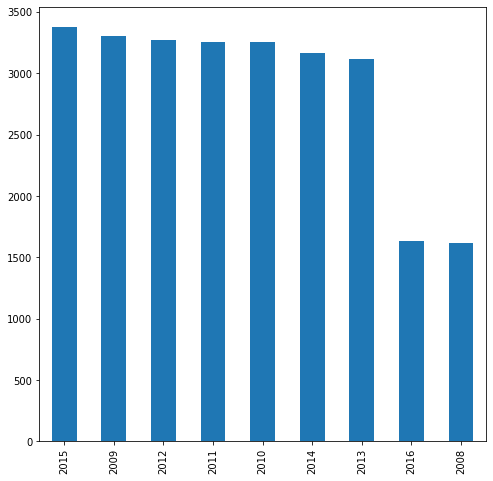

In [15]:
# chosing the most 3 years we have data for.
match.Year.value_counts().plot(kind='bar', figsize=(8, 8))

In [16]:
# Notice the data should be consistant with all dataframes, if we check the data in [team_att] dataframe
# we will found that there is no data for 2009 teams ... so we will not use 2009 and we use 2010 istead of it

# So our analysis will be only on 2010 - 2012 - 2015.
match = match.query('Year in [2010, 2012, 2015]')

In [17]:
match.head(2)

,id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Year
376,377,1,2009/2010,19,2010-02-03,665626,8635,8342,3,2,2010
378,379,1,2009/2010,19,2010-02-04,665630,9986,9985,2,3,2010


#### Cleaning 'player' dataset :

In [18]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [19]:
# we need to change data type of birthday column form object to date time.
player['birthday'] = pd.to_datetime(player['birthday'])
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11060 non-null  int64         
 1   player_api_id       11060 non-null  int64         
 2   player_name         11060 non-null  object        
 3   player_fifa_api_id  11060 non-null  int64         
 4   birthday            11060 non-null  datetime64[ns]
 5   height              11060 non-null  float64       
 6   weight              11060 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 605.0+ KB


##### Distribution of ages og the players:

In [20]:
# adding a new column named 'Age' to show the distribution of the ages.
player['Age'] = pd.datetime.now().year - pd.DatetimeIndex(player['birthday']).year
player.head()


C:\Users\zmlka\AppData\Local\Temp\ipykernel_11068\2323619251.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  player['Age'] = pd.datetime.now().year - pd.DatetimeIndex(player['birthday']).year


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,Age
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,30
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,33
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,163,31
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,198,40
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154,43


<AxesSubplot:>

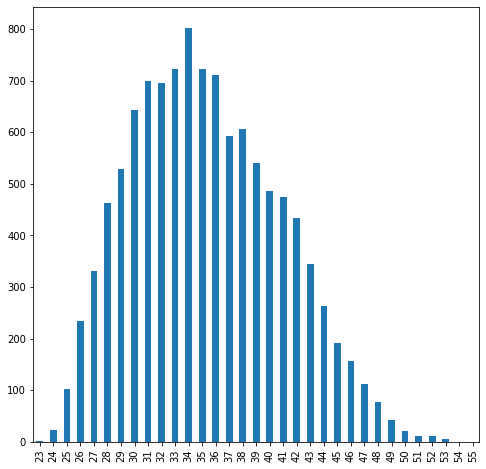

In [84]:
ide = sorted(player.Age.value_counts().index)
player.Age.value_counts()[ide].plot(kind='bar', figsize=(8, 8))

#### Cleaning 'player_att' dataset :

In [23]:
player_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [24]:
# we will drop all players who has null values in their attributes.
player_att.dropna(inplace=True)

In [25]:
# check if there is null values: 
print('number of null values now: ', player_att.isnull().any().sum());

number of null values now:  0


In [26]:
# we need to change data type of [date] column form object to date time.
player_att['date'] = pd.to_datetime(player_att['date'])

# and making a column [Year] of data.
player_att['Year'] = pd.DatetimeIndex(player_att['date']).year
player_att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   180354 non-null  int64         
 1   player_fifa_api_id   180354 non-null  int64         
 2   player_api_id        180354 non-null  int64         
 3   date                 180354 non-null  datetime64[ns]
 4   overall_rating       180354 non-null  float64       
 5   potential            180354 non-null  float64       
 6   preferred_foot       180354 non-null  object        
 7   attacking_work_rate  180354 non-null  object        
 8   defensive_work_rate  180354 non-null  object        
 9   crossing             180354 non-null  float64       
 10  finishing            180354 non-null  float64       
 11  heading_accuracy     180354 non-null  float64       
 12  short_passing        180354 non-null  float64       
 13  volleys       

In [28]:
# filtering the data with players of 2010 - 2012 - 2015
player_att = player_att.query('Year in [2010, 2012, 2015]')

#### Cleaning 'team' dataset :

In [29]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [30]:
# droping all rows that contain null values (11 value)
team.dropna(inplace=True)

In [31]:
# check if there is null values: 
print('number of null values now: ', team.isnull().any().sum());

number of null values now:  0


#### Cleaning 'team_att' dataset :

In [32]:
team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [33]:
# i'd like to drop the column itself 'which contains all null values' as i wont use it.
team_att.drop(columns = 'buildUpPlayDribbling', inplace=True)

In [34]:
# cheacking for other null values:
print('Number of null values now: ', team_att.isnull().sum().sum())

Number of null values now:  0


In [35]:
team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              1458 non-null   int64 
 1   team_fifa_api_id                1458 non-null   int64 
 2   team_api_id                     1458 non-null   int64 
 3   date                            1458 non-null   object
 4   buildUpPlaySpeed                1458 non-null   int64 
 5   buildUpPlaySpeedClass           1458 non-null   object
 6   buildUpPlayDribblingClass       1458 non-null   object
 7   buildUpPlayPassing              1458 non-null   int64 
 8   buildUpPlayPassingClass         1458 non-null   object
 9   buildUpPlayPositioningClass     1458 non-null   object
 10  chanceCreationPassing           1458 non-null   int64 
 11  chanceCreationPassingClass      1458 non-null   object
 12  chanceCreationCrossing          1458 non-null   

In [36]:
# changing the dtype of the column [date] from object to date time.
# and making a column with the name 'Year'.

team_att['date'] = pd.to_datetime(team_att['date'])
team_att['Year'] = pd.DatetimeIndex(team_att['date']).year
team_att.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,Year
0,1,434,9930,2010-02-22,60,Balanced,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,2010
1,2,434,9930,2014-09-19,52,Balanced,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,2014
2,3,434,9930,2015-09-10,47,Balanced,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,2015
3,4,77,8485,2010-02-22,70,Fast,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,2010
4,5,77,8485,2011-02-22,47,Balanced,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,2011


In [37]:
# filtering by the year to select data only of 2010 - 2012 - 2015
team_att = team_att.query('Year in [2010, 2012, 2015]')

#### Merging 'player' with 'player_att' datasets, to put the players info with his statistics in one dataset 'PlayerData'.

In [38]:
print('Columns of [player] are:', '\n' , list(player.columns), '\n');
print('Columns of [player_att] are:', '\n' , list(player_att.columns), '\n');

Columns of [player] are: 
 ['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday', 'height', 'weight', 'Age'] 

Columns of [player_att] are: 
 ['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'Year'] 



In [39]:
PlayerData = pd.merge(left=player, right=player_att, on=['player_api_id'])
PlayerData.head()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,Age,id_y,player_fifa_api_id_y,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,Year
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,30,2,218353,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,30,3,218353,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,30,4,218353,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015
3,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,33,9,189615,2015-12-24,73.0,75.0,left,high,medium,79.0,51.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,70.0,79.0,78.0,78.0,67.0,90.0,71.0,84.0,79.0,56.0,58.0,67.0,66.0,58.0,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,2015
4,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,33,10,189615,2015-12-17,73.0,75.0,left,high,medium,79.0,51.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,70.0,79.0,78.0,78.0,67.0,90.0,71.0,84.0,79.0,56.0,58.0,67.0,66.0,58.0,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,2015


In [41]:
# droping not important columns in the new DataFrame.
# driping the player and player_att dataframes, as there is no need for them now.
# del player
# del player_att
try:
    PlayerData.drop(columns=['id_x', 'id_y', 'player_api_id', 'player_fifa_api_id_x', 'player_fifa_api_id_y', 'birthday'], inplace=True)
except:
    print('already these columns were dropped!')
    

already these columns were dropped!


#### Merging 'team' with 'team_att' datasets, to put the players info with his statistics in one dataset 'TeamData'.

In [42]:
print('Columns of [team] are:', '\n' , list(team.columns), '\n');
print('Columns of [team_att] are:', '\n' , list(team_att.columns), '\n');

Columns of [team] are: 
 ['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name', 'team_short_name'] 

Columns of [team_att] are: 
 ['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed', 'buildUpPlaySpeedClass', 'buildUpPlayDribblingClass', 'buildUpPlayPassing', 'buildUpPlayPassingClass', 'buildUpPlayPositioningClass', 'chanceCreationPassing', 'chanceCreationPassingClass', 'chanceCreationCrossing', 'chanceCreationCrossingClass', 'chanceCreationShooting', 'chanceCreationShootingClass', 'chanceCreationPositioningClass', 'defencePressure', 'defencePressureClass', 'defenceAggression', 'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass', 'defenceDefenderLineClass', 'Year'] 



In [43]:
TeamData = pd.merge(left=team, right=team_att, on=['team_api_id'])
TeamData.head()

,id_x,team_api_id,team_fifa_api_id_x,team_long_name,team_short_name,id_y,team_fifa_api_id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,Year
0,1,9987,673.0,KRC Genk,GEN,485,673,2010-02-22,45,Balanced,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,2010
1,1,9987,673.0,KRC Genk,GEN,487,673,2012-02-22,53,Balanced,Little,55,Mixed,Organised,55,Normal,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover,2012
2,1,9987,673.0,KRC Genk,GEN,490,673,2015-09-10,58,Balanced,Normal,38,Mixed,Organised,30,Safe,69,Lots,56,Normal,Organised,36,Medium,57,Press,70,Wide,Cover,2015
3,2,9993,675.0,Beerschot AC,BAC,149,675,2010-02-22,35,Balanced,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,2010
4,2,9993,675.0,Beerschot AC,BAC,151,675,2012-02-22,55,Balanced,Little,55,Mixed,Organised,47,Normal,46,Normal,49,Normal,Organised,45,Medium,46,Press,50,Normal,Cover,2012


In [45]:
# droping not important columns in the new DataFrame.
try:
    TeamData.drop(columns=['id_x', 'date', 'id_y', 'team_fifa_api_id_x', 'team_fifa_api_id_y'], inplace=True)
except:
    print('already these columns were dropped!')

already these columns were dropped!


In [46]:
TeamData.head()

,team_api_id,team_long_name,team_short_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,Year
0,9987,KRC Genk,GEN,45,Balanced,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,2010
1,9987,KRC Genk,GEN,53,Balanced,Little,55,Mixed,Organised,55,Normal,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover,2012
2,9987,KRC Genk,GEN,58,Balanced,Normal,38,Mixed,Organised,30,Safe,69,Lots,56,Normal,Organised,36,Medium,57,Press,70,Wide,Cover,2015
3,9993,Beerschot AC,BAC,35,Balanced,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,2010
4,9993,Beerschot AC,BAC,55,Balanced,Little,55,Mixed,Organised,47,Normal,46,Normal,49,Normal,Organised,45,Medium,46,Press,50,Normal,Cover,2012


#### Merging 'leauge' with 'country' datasets, to put the players info with his statistics in one dataset 'LeagueCoun'.

In [47]:
print('Columns of [league] are:', '\n' , list(league.columns), '\n');
print('Columns of [country] are:', '\n' , list(country.columns), '\n');

Columns of [league] are: 
 ['id', 'country_id', 'name'] 

Columns of [country] are: 
 ['id', 'name'] 



In [48]:
LeagueCoun = pd.merge(left=league, right=country, left_on='country_id', right_on='id')
LeagueCoun.head()

,id_x,country_id,name_x,id_y,name_y
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy


In [49]:
# droping not important columns in the new DataFrame.
# we notice that all country_ids is the same for their league_ids 
try:
    LeagueCoun.drop(columns=['id_y', 'country_id'], inplace=True)
except:
    print('already these columns were dropped!')

In [50]:
# renaming columns 
LeagueCoun.rename(columns={'id_x': 'league_id', 'name_x': 'league_name', 'name_y': 'country_name'}, inplace=True)

In [51]:
LeagueCoun

,league_id,league_name,country_name
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


#### Merging 'LeagueCount' with 'match' datasets, to put the players info with his statistics in one dataset 'Match_League_Country'.

In [52]:
print('Columns of [LeagueCoun] are:', '\n' , list(LeagueCoun.columns), '\n');
print('Columns of [match] are:', '\n' , list(match.columns), '\n');

Columns of [LeagueCoun] are: 
 ['league_id', 'league_name', 'country_name'] 

Columns of [match] are: 
 ['id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'Year'] 



In [53]:
Match_League_Country = pd.merge(left=match, right=LeagueCoun, on='league_id')
Match_League_Country.head()

,id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Year,league_name,country_name
0,377,1,2009/2010,19,2010-02-03,665626,8635,8342,3,2,2010,Belgium Jupiler League,Belgium
1,379,1,2009/2010,19,2010-02-04,665630,9986,9985,2,3,2010,Belgium Jupiler League,Belgium
2,382,1,2009/2010,19,2010-02-02,665634,8203,9993,1,0,2010,Belgium Jupiler League,Belgium
3,405,1,2009/2010,22,2010-01-30,665665,8342,10001,2,1,2010,Belgium Jupiler League,Belgium
4,406,1,2009/2010,22,2010-01-17,665666,9985,8635,0,4,2010,Belgium Jupiler League,Belgium


In [54]:
# deleting the [LeagueCoun] as we don't need it now after constructing [Match_League_Country]
# del LeagueCoun

# droping not important columns in the new DataFrame.
# we notice that all country_ids is the same for their league_ids 
try:
    Match_League_Country.drop(columns=['id', 'league_id'], inplace=True)
except:
    print('already these columns were dropped!')


In [55]:
# making a new column [Total_goals].
Match_League_Country['Total_goals'] = Match_League_Country.home_team_goal + Match_League_Country.away_team_goal

In [56]:
Match_League_Country.head()

,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Year,league_name,country_name,Total_goals
0,2009/2010,19,2010-02-03,665626,8635,8342,3,2,2010,Belgium Jupiler League,Belgium,5
1,2009/2010,19,2010-02-04,665630,9986,9985,2,3,2010,Belgium Jupiler League,Belgium,5
2,2009/2010,19,2010-02-02,665634,8203,9993,1,0,2010,Belgium Jupiler League,Belgium,1
3,2009/2010,22,2010-01-30,665665,8342,10001,2,1,2010,Belgium Jupiler League,Belgium,3
4,2009/2010,22,2010-01-17,665666,9985,8635,0,4,2010,Belgium Jupiler League,Belgium,4


### Our final data tables which we have and will use: 

In [57]:
PlayerData.head(1)

,player_name,height,weight,Age,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,Year
0,Aaron Appindangoye,182.88,187,30,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015


In [58]:
TeamData.head(1)

,team_api_id,team_long_name,team_short_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,Year
0,9987,KRC Genk,GEN,45,Balanced,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,2010


In [59]:
Match_League_Country.head(1)

,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Year,league_name,country_name,Total_goals
0,2009/2010,19,2010-02-03,665626,8635,8342,3,2,2010,Belgium Jupiler League,Belgium,5


<a id='eda'></a>
# **Exploratory Data Analysis**

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### 1) What is the league with the most goals all over the 3 years we focus on?

In [142]:
Match_League_Country.groupby(['Year', 'league_name']).mean()
# x = [1, 2, 3]
# width = 0.35
# fig, ax = plt.subplots()
# ax.set_ylabel('avg goals per match')
# ax.set_title('ATTTACK')
# ax.set_xticks(x)
# ax.set_xticklabels(years)


stage  match_api_id  home_team_api_id  \
Year league_name                                                           
2010 Belgium Jupiler League    15.096491  7.885522e+05       9450.710526   
     England Premier League    19.435829  7.509521e+05       8999.393048   
     France Ligue 1            19.477690  7.411046e+05      11824.475066   
     Germany 1. Bundesliga     17.500000  7.657314e+05       9196.192810   
     Italy Serie A             19.496063  7.853838e+05       9149.590551   
     Netherlands Eredivisie    17.531646  7.543375e+05       9362.212025   
     Poland Ekstraklasa        15.428571  7.624611e+05       6391.022321   
     Portugal Liga ZON Sagres  15.500000  7.671845e+05       8889.387500   
     Scotland Premier League   19.608696  7.620240e+05       9229.269565   
     Spain LIGA BBVA           19.410256  7.632206e+05       9175.456410   
     Switzerland Super League  18.500000  8.067232e+05       9539.850000   
2012 Belgium Jupiler League    16.000000  1.160343e+06       9004.219697   
     England Premier League    19.470588  1.128636e+06       9271.739130   
     France Ligue 1            19.500000  1.118471e+06       9085.200000   
     Germany 1. Bundesliga     17.500000  1.134929e+06       9092.104575   
     Italy Serie A             18.973545  1.180313e+06       9011.962963   
     Netherlands Eredivisie    17.514286  1.128609e+06       9353.269841   
     Poland Ekstraklasa        15.428571  1.131743e+06       6589.781250   
     Portugal Liga ZON Sagres  15.601732  1.130773e+06       8741.900433   
     Scotland Premier League   19.574561  1.156632e+06       9191.057018   
     Spain LIGA BBVA           19.025641  1.142652e+06       8878.812821   
     Switzerland Super League  17.500000  1.192092e+06       9842.444444   
2015 Belgium Jupiler League    15.522822  1.900589e+06      25543.452282   
     England Premier League    19.500000  1.856448e+06       9179.697368   
     France Ligue 1            19.485564  1.849897e+06       9136.666667   
     Germany 1. Bundesliga     17.500000  1.867546e+06       9178.892157   
     Italy Serie A             19.396907  1.905685e+06      13734.664948   
     Netherlands Eredivisie    17.500000  1.847986e+06       8943.836601   
     Poland Ekstraklasa        15.812500  1.901058e+06      13965.128906   
     Portugal Liga ZON Sagres  17.500000  1.859883e+06      21954.287582   
     Scotland Premier League   19.558333  1.887148e+06       8909.008333   
     Spain LIGA BBVA           19.435897  1.887444e+06       8987.294872   
     Switzerland Super League  18.500000  1.884475e+06       9981.800000   

                               away_team_api_id  home_team_goal  \
Year league_name                                                  
2010 Belgium Jupiler League         9420.021930        1.627193   
     England Premier League         8972.286096        1.590909   
     France Ligue 1                11590.566929        1.335958   
     Germany 1. Bundesliga          9207.029412        1.666667   
     Italy Serie A                  9144.918635        1.498688   
     Netherlands Eredivisie         9357.971519        1.841772   
     Poland Ekstraklasa             6413.843750        1.379464   
     Portugal Liga ZON Sagres       8877.370833        1.429167   
     Scotland Premier League        9191.773913        1.395652   
     Spain LIGA BBVA                9182.400000        1.620513   
     Switzerland Super League       9539.850000        1.755556   
2012 Belgium Jupiler League         9048.071970        1.719697   
     England Premier League         9277.117647        1.613811   
     France Ligue 1                 9068.250000        1.476316   
     Germany 1. Bundesliga          9131.562092        1.594771   
     Italy Serie A                  9025.843915        1.552910   
     Netherlands Eredivisie         9344.022222        1.765079   
     Poland Ekstraklasa             6568.875000        1.263393   
     Portugal Liga ZON Sagres     

<AxesSubplot:xlabel='league_name'>

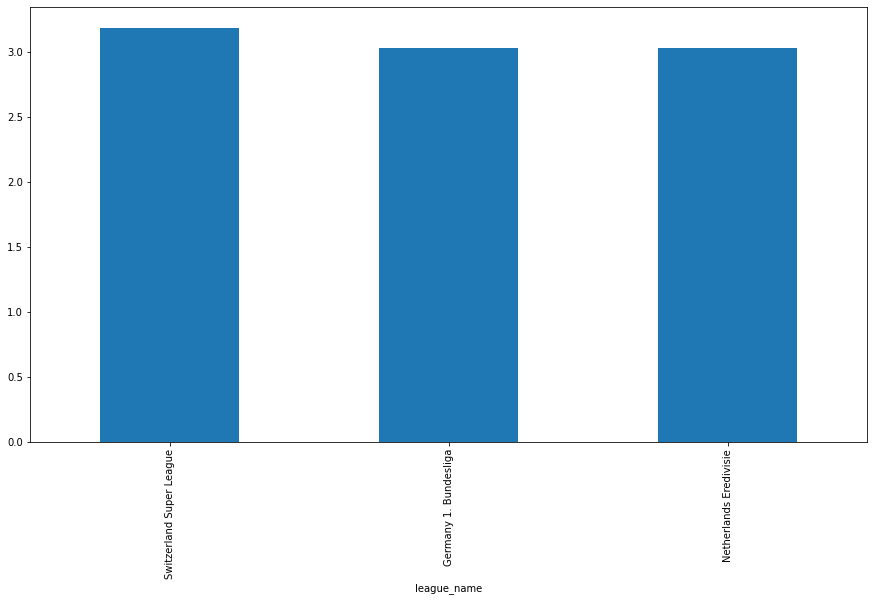

In [107]:
goal_2012 = Match_League_Country.query('Year == 2012')
propotions = goal_2012.groupby(['league_name']).mean()['Total_goals'].nlargest(3)
# df_12 = pd.Series(data=propotions.values, index=propotions.index)
# df.plot(kind='bar', figsize=(15, 8))

In [ ]:
goal_10= Match_League_Country.query('Year == 2010')
propotions = goal_10.groupby(['league_name']).mean()['Total_goals'].nlargest(3)

goal_12 = Match_League_Country.query('Year == 2012')
propotions = goal_12.groupby(['league_name']).mean()['Total_goals'].nlargest(3)

goal_15 = Match_League_Country.query('Year == 2015')
propotions = goal_15.groupby(['league_name']).mean()['Total_goals'].nlargest(3)

goal_10.plot.bar()

In [ ]:
PlayerData.plot(kind='scatter', y='potential', x=['overall_rating'])

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!